In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# class Linear_Regression:
#   def __init__(self, x, target, columns, learning_rate, epoch, non_numeric_columns, convert_to_vector):
#     self.columns = columns
#     self.x = x
#     self.target = target
#     self.learning_rate = learning_rate
#     self.epoch = epoch
#     self.non_numeric_columns = non_numeric_columns
#     self.non_numeric_dic = {}
#     self.convert_to_vector = convert_to_vector
#     self.convert_to_vector_value = {}
#     self.final_columns = self.columns.copy()

#   def one_hot_encode(self, dictionary, values):
#     for x in values:
#         if x not in dictionary.keys():
#             dictionary[x] = len(dictionary)

#   def one_hot_decode(self, dictionary, key):
#     if key in dictionary.keys():
#         return dictionary[key]
#     dictionary[key] = len(dictionary)
#     return dictionary[key]

#   def convert_to_numeric(self):
#     for i in self.non_numeric_columns:
#       dictionary = {}
#       self.non_numeric_dic[i] = dictionary
#       self.one_hot_encode(dictionary, self.x[i].values)
#       self.x[i] = [self.one_hot_decode(dictionary, j) for j in self.x[i].values]

#   def normalize(self):
#     self.normalize_dictionary = {}
#     for i in self.final_columns:
#       if i in self.convert_to_vector:
#         continue
#       mean = np.mean(self.x[i])
#       var = np.var(self.x[i])
#       self.x[i] = (self.x[i] - mean) / var
#       self.normalize_dictionary[i] = {'mean':mean, 'var':var}
  
#   def gradian_function(self, predict, w, x_vector):
#     return np.dot(predict - self.target, x_vector) / len(x_vector)

#   def cost_function_simplified(self, predicts):
#     return np.sum((predicts - self.target) ** 2) / (2 * len(self.target))

#   def convert_columns_to_Vector(self):
#     for i in self.convert_to_vector:
#       if i in self.final_columns:
#         self.convert_to_vector_value[i] = self.x[i].nunique()
#         self.final_columns.remove(i)
#       count = self.convert_to_vector_value[i]
#       for j in range(count):
#         self.final_columns.append(i + str(j))
#         self.x[i + str(j)] = np.where(self.x[i] == j, 1, 0)

#   def LR_GD(self):
#     self.convert_to_numeric()
#     self.normalize()
#     self.convert_columns_to_Vector()
#     x_vector = self.x.loc[:, self.final_columns].to_numpy()
#     # Adding A New Column With Value 1, Just To Set The Bias Along Side With W
#     bias = np.ones(len(self.x))
#     x_vector = np.c_[x_vector, bias]
#     w = [random.random() for x in range(len(self.final_columns) + 1)]
#     # w = [random.random() for x in range(len(columns))]
#     # w.append(np.mean(self.target))
#     predict = np.dot(x_vector, w)
#     costs = []
#     cost = self.cost_function_simplified(predict)
#     costs.append(cost)
#     for i in range(self.epoch):
#       gradian = self.gradian_function(predict, w, x_vector)
#       w = w - (self.learning_rate * gradian)
#       predict = np.dot(x_vector, w)
#       predict = np.array(predict)
#       cost = self.cost_function_simplified(predict)
#       costs.append(cost)
#     plt.plot([i for i in range(len(costs))], costs)
#     plt.xlabel('Test Number')
#     plt.ylabel('Cost Function')
#     plt.title('Cost-Function-Result')
#     plt.savefig("Cost-Function-Image.png")
#     plt.show()
#     return w

#   def test(self, x_vector, target, w, show_plot = True, path = ''):
#     for col in self.non_numeric_columns:
#       dic = self.non_numeric_dic[col]
#       x_vector[col] = [self.one_hot_decode(dic, i) for i in x_vector[col].values]

#     for col in self.columns:
#       if col in self.convert_to_vector:
#         continue
#       dic = self.normalize_dictionary[col]
#       x_vector[col] = [(i - dic['mean']) / dic['var'] for i in x_vector[col]]

#     for i in self.convert_to_vector:
#       count = self.convert_to_vector_value[i]
#       for j in range(count):
#         x_vector[i + str(j)] = np.where(x_vector[i] == j, 1, 0)

#     x_matrix = x_vector.loc[:, self.final_columns].to_numpy()
#     bias_matrix = np.ones(len(x_vector))
#     x_matrix = np.c_[x_matrix, bias_matrix]
#     predict = np.absolute(np.dot(x_matrix, w))
#     if not show_plot:
#       df = pd.read_csv('/content/drive/MyDrive/ML_HW2_Q1/test.csv')
#       df['Price'] = predict
#       df.loc[:,['Price', 'CarId']].to_csv('/content/predict.csv', index = False)
#       return
#     plt.plot([x for x in range(len(target))], np.array(target), color='b')
#     plt.plot([x for x in range(len(predict))], np.array(predict), color='r')
#     plt.savefig('Test.png')
#     plt.show()
#     mins = [min(target), min(predict)]
#     maxs = [max(target), max(predict)]
#     plt.plot([min(mins), max(maxs)], [min(mins), max(maxs)])
#     plt.scatter(predict, target)
#     plt.xlabel('Predicted Price')
#     plt.ylabel('Price')
#     plt.savefig('Professional-Result.png')
#     plt.show()

In [82]:
class Polynomial_Regression:
  def __init__(self, train, target, dimensions, learning_rate, epoch):
    self.train = train.to_numpy()
    self.target = target.to_numpy()
    self.dimensions = dimensions
    self.learning_rate = learning_rate
    self.epoch = epoch
  
  def normalize(self):
    self.mean = np.mean(self.train)
    self.var = np.var(self.train)
    self.x = (self.train - self.mean) / self.var
    self.x = np.array([(np.array(self.x) ** x) for x in self.dimensions])
    self.x = np.transpose(self.x)

  def gradian_function(self, predict, w):
    return np.dot(predict - self.target, self.x) / len(self.x)

  def cost_function_simplified(self, predicts):
    return np.sum((predicts - self.target) ** 2) / (2 * len(self.target))

  def PR_GD(self):
    self.normalize()
    print('self.x[0]:')
    print(self.x[0])
    w = np.array([abs(random.random()) for x in self.dimensions])
    predict = np.dot(self.x, w)
    costs = []
    cost = self.cost_function_simplified(predict)
    costs.append(cost)
    for i in range(self.epoch):
      gradian = self.gradian_function(predict, w)
      w = w - (self.learning_rate * gradian)
      predict = np.dot(self.x, w)
      cost = self.cost_function_simplified(predict)
      costs.append(cost)
    plt.plot([i for i in range(len(costs))], costs)
    plt.xlabel('Test Number')
    plt.ylabel('Cost Function')
    plt.title('Cost-Function-Result')
    plt.savefig("Cost-Function-Image.png")
    plt.show()
    return w
  
  def test(self, w, test, correct):
    test = np.array((test - self.mean) / self.var)
    test = np.array([(test ** x) for x in self.dimensions])
    test = np.transpose(test)
    predict = np.dot(test, w)
    print('Predict:')
    print(predict)
    plt.plot([x for x in range(len(correct))], np.array(correct), color='b')
    plt.plot([x for x in range(len(predict))], np.array(predict), color='r')
    # dff = pd.read_csv('/content/drive/MyDrive/ML_HW2_Q2/data.csv')
    # lable = dff.iloc[len(dff) - 100:, :]
    # lable = np.array(lable['Mileage'])
    # plt.scatter(lable, np.array(correct), color='b')
    # plt.scatter(lable, np.array(predict), color='r')
    plt.savefig('Test.png')
    plt.show()
    mins = [min(correct), min(predict)]
    maxs = [max(correct), max(predict)]
    plt.plot([min(mins), max(maxs)], [min(mins), max(maxs)])
    plt.scatter(predict, correct)
    plt.xlabel('Mileage')
    plt.ylabel('Price')
    plt.savefig('Professional-Result.png')
    plt.show()

self.x[0]:
[ 1.00000000e+00 -2.09031554e-05  4.36941904e-10 -9.13346451e-15]


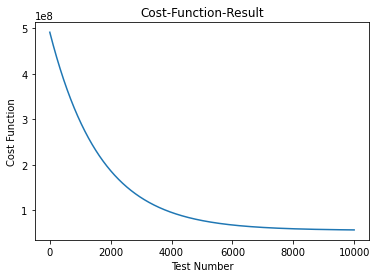

[ 2.80524229e+04 -2.02609615e-01  3.48663416e-01  4.50278198e-01]
Predict:
[28052.42289074 28052.42288991 28052.4228899  28052.42289243
 28052.42288966 28052.42288984 28052.42288465 28052.42288952
 28052.42288736 28052.42289233 28052.42289258 28052.42288193
 28052.42288677 28052.42288721 28052.42289159 28052.42287957
 28052.42289025 28052.42289169 28052.42289171 28052.42289163
 28052.42289193 28052.42289085 28052.42289324 28052.42289057
 28052.42289157 28052.42289272 28052.42289001 28052.42289291
 28052.42288988 28052.42289255 28052.42288634 28052.42289155
 28052.42288929 28052.42288983 28052.42289268 28052.42288458
 28052.42288959 28052.42288279 28052.42288713 28052.42288971
 28052.42289047 28052.42288625 28052.42288504 28052.42289204
 28052.42289204 28052.42289139 28052.42288966 28052.42289098
 28052.42289173 28052.42289111 28052.4228833  28052.42288208
 28052.42289022 28052.42289351 28052.42288516 28052.42288336
 28052.4228908  28052.42288913 28052.42289127 28052.42289073
 28052.422

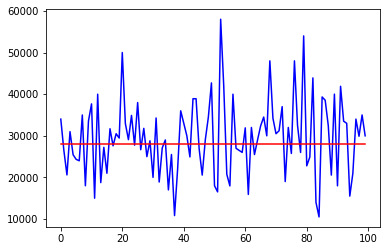

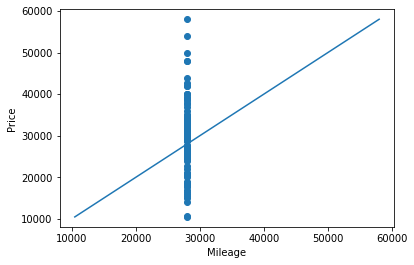

In [83]:
df = pd.read_csv('/content/drive/MyDrive/ML_HW2_Q2/data.csv')
train_limit_number = len(df) - 100
test = df.iloc[train_limit_number:, :]
df = df.iloc[:train_limit_number, :]
dimensions = [0, 1, 2, 3]
# dimensions = [0, 1]
train = df['Mileage']
target = df['Price']
learning_rate = 0.0003
epoch = 10000
pr = Polynomial_Regression(train, target, dimensions, learning_rate, epoch)
weights = pr.PR_GD()
print(weights)
pr.test(weights, test['Mileage'].to_numpy(), test['Price'].to_numpy())